In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

In [2]:
bp = 15
m, n = 5, 10
T = 20*np.pi/180
delta = 20*np.pi/180
c_r, c_t = 5, 5
U_i = 100
dt = 0.1
alpha = 5*np.pi/180

In [3]:
X,PC = wing_panels(bp, T, delta, c_r, c_t, m, n)

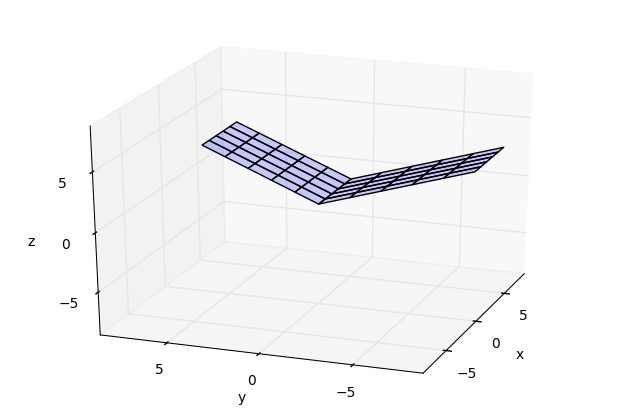

In [4]:
plot_panels(X);

In [5]:
XV = steady_wing_vortex_panels(X,U_i,dt,alpha)

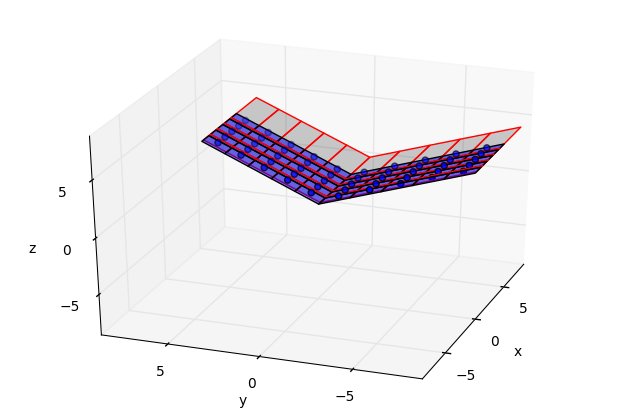

In [6]:
ax = plot_panels(X,transp=0.5,elev=30,azim=-160)
plot_panels(XV,ax=ax,edge_color='r',fill_color=0)
plot_control_points(PC,ax);

In [7]:
def panel_on_pc_induced_velocity(PC,X,G=1):
    norm = lambda x: np.linalg.norm(x,ord=2,axis=1).reshape(-1,1)
    r1 = X - PC
    r2 = np.roll(r1, shift=-1, axis=0)
    
    cp = np.cross(r1,r2)
    
    d1 = r2 - r1
    d2 = r1/norm(r1) - r2/norm(r2)
    
    return (-G/(4*np.pi)*cp/(norm(cp)**2)*np.einsum('ij,ij->i', d1, d2).reshape(-1,1)).sum(axis=0)

In [8]:
def panel_normal_vectors(X):
    d1 = X[:,:,2] - X[:,:,0]
    d2 = X[:,:,1] - X[:,:,3]
    n = np.cross(d1,d2)
    return n / np.linalg.norm(n,ord=2,axis=2).reshape(m,-1,1)

In [9]:
def wing_influence_matrix(X,PC):
    m, n = X.shape[:2]
    X_r = X.reshape(m*n,4,3)
    PC_r = PC.reshape(m*n,3)
    aic = np.empty((m*n,m*n))
    nv = panel_normal_vectors(X).reshape(m*n,3)
    for r in range(m*n):
        for s in range(m*n):
            aic[r,s] = np.dot(panel_on_pc_induced_velocity(X_r[s],PC_r[r]),nv[r])
    return aic

In [10]:
aic_wing = wing_influence_matrix(X,PC)